In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

Example Pictures

y = 0. It's a non-cat picture.


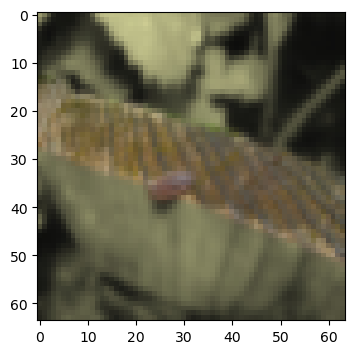

In [3]:
index = 12
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

y = 1. It's a cat picture.


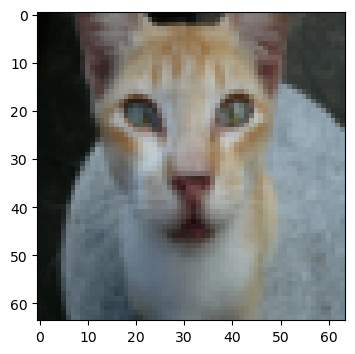

In [4]:
index = 11
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

Revealing details about the dataset

In [5]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)




Reshaping and standardising data

In [6]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


Creating the Model

In [18]:
layers_dims = [12288, 256, 20, 7, 5, 1]

In [19]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
            
    return parameters, costs

Training The Model

In [20]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2000, print_cost = True)

Cost after iteration 0: 0.6934327669860538
Cost after iteration 100: 0.5971154138344179
Cost after iteration 200: 0.5335797142146117
Cost after iteration 300: 0.47577425684525854
Cost after iteration 400: 0.4278635172499778
Cost after iteration 500: 0.37451443999993106
Cost after iteration 600: 0.2885065678506511
Cost after iteration 700: 0.2456834467505641
Cost after iteration 800: 0.09623600294399065
Cost after iteration 900: 0.059646429504720266
Cost after iteration 1000: 0.03442162051833161
Cost after iteration 1100: 0.02326578792959494
Cost after iteration 1200: 0.016926881396961118
Cost after iteration 1300: 0.012959780706468046
Cost after iteration 1400: 0.010307041962526105
Cost after iteration 1500: 0.008441616406658834
Cost after iteration 1600: 0.007081024369426257
Cost after iteration 1700: 0.006054265686870036
Cost after iteration 1800: 0.005256730489393608
Cost after iteration 1900: 0.004626360155180489
Cost after iteration 1999: 0.0041186295524847545


In [21]:
import pickle

model_pkl_file = "ConCat_Classifier_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(parameters, file)

Displaying Accuracies

In [32]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [33]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


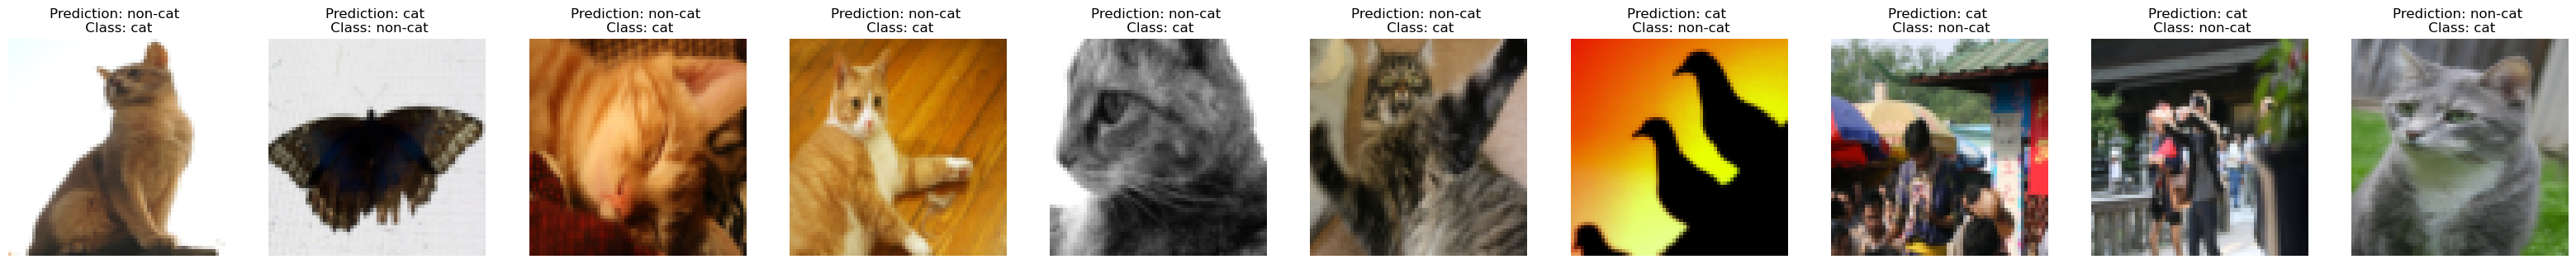

In [34]:
print_mislabeled_images(classes, test_x, test_y, pred_test)